# Preprocessing

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
image_size = 227
epochs = 10
train_path = os.path.normpath("D:\Projects\DL\BCC\dataset\Train")
test_path = os.path.normpath("D:\Projects\DL\BCC\dataset\Test")
batch_size = 32
seed = 40
color_channel = 1

In [7]:
# Data stored in the form of tensors
train_ds = image_dataset_from_directory(
    train_path,
    labels = "inferred",
    label_mode = "int",
    validation_split = 0.2,
    subset = "training",
    seed = seed,
    image_size = (image_size,image_size),
    batch_size = batch_size,
)

val_ds = image_dataset_from_directory(
    train_path,
    labels = "inferred",
    label_mode = "int",
    validation_split = 0.2,
    subset = "validation",
    seed = seed,
    image_size = (image_size,image_size),
    batch_size = batch_size,
)

Found 2233 files belonging to 2 classes.
Using 1787 files for training.
Found 2233 files belonging to 2 classes.
Using 446 files for validation.


In [8]:
test_ds = image_dataset_from_directory(
    test_path,
    labels = "inferred",
    label_mode = "int",
    seed = seed,
    image_size = (image_size,image_size),
    batch_size = batch_size,
)

Found 638 files belonging to 2 classes.


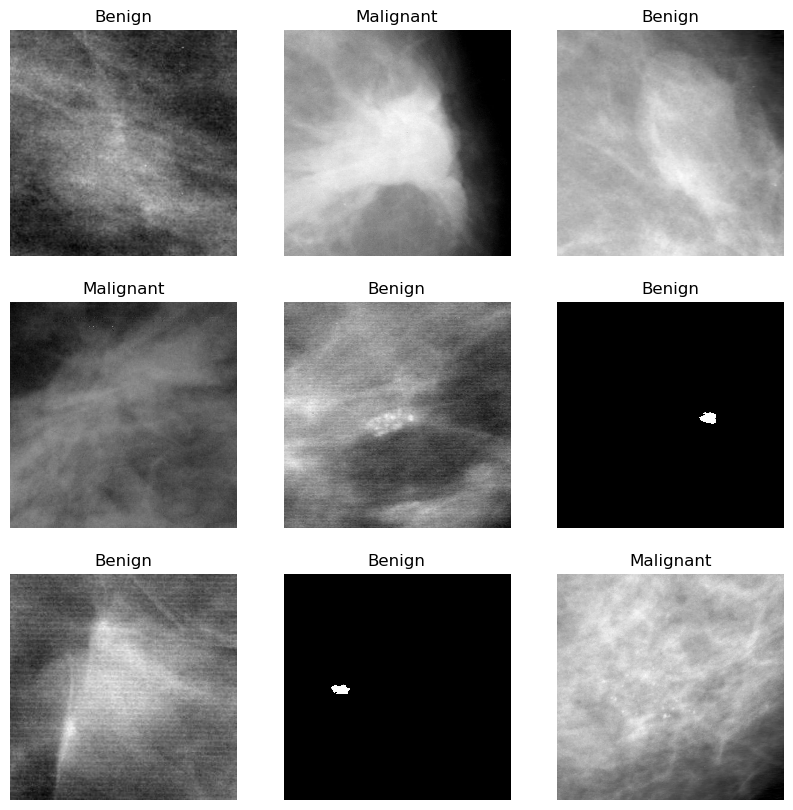

In [9]:
#kernel crashes when attempting to display some of the images using matplotlib in vscode
# Just for displaying some images with their labels
plt.figure(figsize = (10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    class_labels = [class_names[label] for label in labels.numpy()]
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_labels[i])
        plt.axis("off")

In [23]:
# convert the data to numpy form
train_images, train_labels, val_images, val_labels = [], [], [], []

for images, labels in train_ds:
    train_images.append(images)
    train_labels.append(labels)

train_images = np.vstack(train_images)
train_labels = np.concatenate(train_labels)

for images, labels in val_ds:
    val_images.append(images)
    val_labels.append(labels)

val_images = np.vstack(val_images)
val_labels = np.concatenate(val_labels)


In [24]:
test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.vstack(test_images)
test_labels = np.concatenate(test_labels)

In [25]:
print(train_labels.shape)
print(train_images.shape)

(1787,)
(1787, 227, 227, 3)


In [9]:
# image_augmentation = ImageDataGenerator(
#     rotation_range = 40, # Randomly rotate up to 40 degrees
#     width_shift_range = 0.2, # Randomly shift width up to 20%
#     height_shift_range = 0.2, # Randomly shift width up to 20%
#     shear_range = 0.2, #shear transformations
#     zoom_range = 0.2, # zoom in or out up to 20%
#     horizontal_flip = True, # Randomly flip images horizontally
#     fill_mode = 'nearest', # how to fill in newly created pixels
#     featurewise_center = True,
#     featurewise_std_normalization = True,
# )

In [10]:
# image_augmentation.fit(train_images)

In [11]:
# train_augmented = image_augmentation.flow(
# train_images, train_labels, batch_size = batch_size)
# val_augmented = image_augmentation.flow(val_images, val_labels, batch_size = batch_size)

# Model

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Input, concatenate, GlobalAveragePooling2D, AveragePooling2D,Flatten
import keras_tuner as kt
from keras_tuner import RandomSearch

Using TensorFlow backend


In [13]:
# model = Sequential()
# model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(image_size, image_size, 3)))  # Adjust input shape
# model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(64, activation="relu"))
# model.add(Dense(1, activation="sigmoid"))  

In [14]:
# def model_builder(hp):
#   model = keras.Sequential()
#   model.add(keras.layers.Flatten(input_shape=(28, 28)))

#   # Tune the number of units in the first Dense layer
#   # Choose an optimal value between 32-512
#   hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
#   model.add(keras.layers.Dense(units=hp_units, activation='relu'))
#   model.add(keras.layers.Dense(10))

#   # Tune the learning rate for the optimizer
#   # Choose an optimal value from 0.01, 0.001, or 0.0001
#   hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

#   model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#                 loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                 metrics=['accuracy'])

#   return model

In [19]:
def build_model(hp):
    #create model object
    model = keras.Sequential([
        #adding first convolutional layer
        keras.layers.Conv2D(
            #adding filter
            filters = hp.Int('conv_1_filter', min_value = 32, max_value= 128, step = 16),
            #adding filter size or kernel size
            kernel_size = hp.Choice('conv_1_kernel', values = [3,5]),
            #activation function
            activation = 'relu',
            input_shape = (image_size, image_size, color_channel)
        ),
        # adding second convolution layer
        keras.layers.Conv2D(
            #adding filter
            filters = hp.Int('conv_2_filter', min_value = 32, max_value= 64, step = 16),
            #adding filter size or kernel size
            kernel_size = hp.Choice('conv_2_kernel', values = [3,5]),
            #activation function
            activation = 'relu'
        ),
        #adding flatten layer
        keras.layers.Flatten(),
        #adding dense layer
        keras.layers.Dense(
            units = hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
            activation = 'relu'
        ), 
        #output layer
        keras.layers.Dense(2, activation='softmax')
    ])
    
    #compilation of model
    model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', values = [1e-2, 1e-3])),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy']
    )
    
    return model
    

In [20]:
# tuner = kt.Hyperband(model_builder,
#                      objective='val_accuracy',
#                      max_epochs=10,
#                      factor=3,
#                      directory='model_tuning',
#                      project_name='breast_cancer_classification')

In [21]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials = 5)

Reloading Tuner from .\untitled_project\tuner0.json


In [22]:
tuner.search(train_images, train_labels, epochs = epochs, validation_data=(val_images, val_labels))


Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
96                |96                |conv_1_filter
5                 |5                 |conv_1_kernel
32                |32                |conv_2_filter
3                 |3                 |conv_2_kernel
80                |80                |dense_1_units
0.001             |0.001             |learning_rate

Epoch 1/10


Traceback (most recent call last):
  File "C:\Users\acer\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\acer\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\L

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\acer\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\acer\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\acer\AppData\Local\Temp\__autograph_generated_file4coqe9q4.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "C:\Users\acer\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\acer\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\acer\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\acer\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\acer\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\acer\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 227, 227, 3)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 227, 227, 3), dtype=float32)
      • training=True
      • mask=None



In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 223, 223, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [15]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer="adam",
              metrics=["accuracy"])

In [16]:
train_steps = len(train_images) // batch_size
valid_steps = len(val_images) // batch_size

In [ ]:
model.fit(train_augmented, steps_per_epoch=train_steps, validation_data=val_augmented, validation_steps=valid_steps, epochs=epochs)

Epoch 1/50
55/55 [==============================] - 156s 3s/step - loss: 0.8096 - accuracy: 0.4957 - val_loss: 0.6933 - val_accuracy: 0.4736
Epoch 2/50
55/55 [==============================] - 151s 3s/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6936 - val_accuracy: 0.4712
Epoch 3/50
33/55 [=================>............] - ETA: 54s - loss: 0.6928 - accuracy: 0.5157

In [ ]:
results = model.evaluate(test_images, test_labels, batch_size=batch_size)
print( 'Loss = {} and Accuracy = {} %'.format( results[0] , results[1] * 100 ) )